In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from neuralforecast.losses.numpy import mae, mse, smape

/Users/cchallu/opt/anaconda3/envs/statsforecast/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
models = ['nhits','tft','lstm','tcn','dilatedrnn']
source_dataset = 'M4'
target_dataset = 'TrafficL'
experiment_id = '20230424'

In [3]:
for model in models:
    if model == 'dilatedrnn':
        model_name = 'DilatedRNN'
    else:
        model_name = model.upper()
    print('Model:', model_name)
    results_df = pd.read_csv(f'./results/forecasts/{target_dataset}/{model}_{source_dataset}_{experiment_id}.csv')
    results_df = results_df.groupby('unique_id').tail(18)

    smape_loss = smape(results_df['y'], results_df[model_name])
    mae_loss = mae(results_df['y'], results_df[model_name])
    print('smape:', smape_loss)
    print('mae:', mae_loss)

Model: NHITS
smape: 1.3456164706960536
mae: 0.8168746067328299
Model: TFT
smape: 1.3791330159684985
mae: 0.9219323564464126
Model: LSTM
smape: 1.2705407190521665
mae: 0.5473897288730137
Model: TCN
smape: 1.272939572787705
mae: 0.5981633395682129
Model: DilatedRNN
smape: 1.2738981667427938
mae: 0.6046413319060798


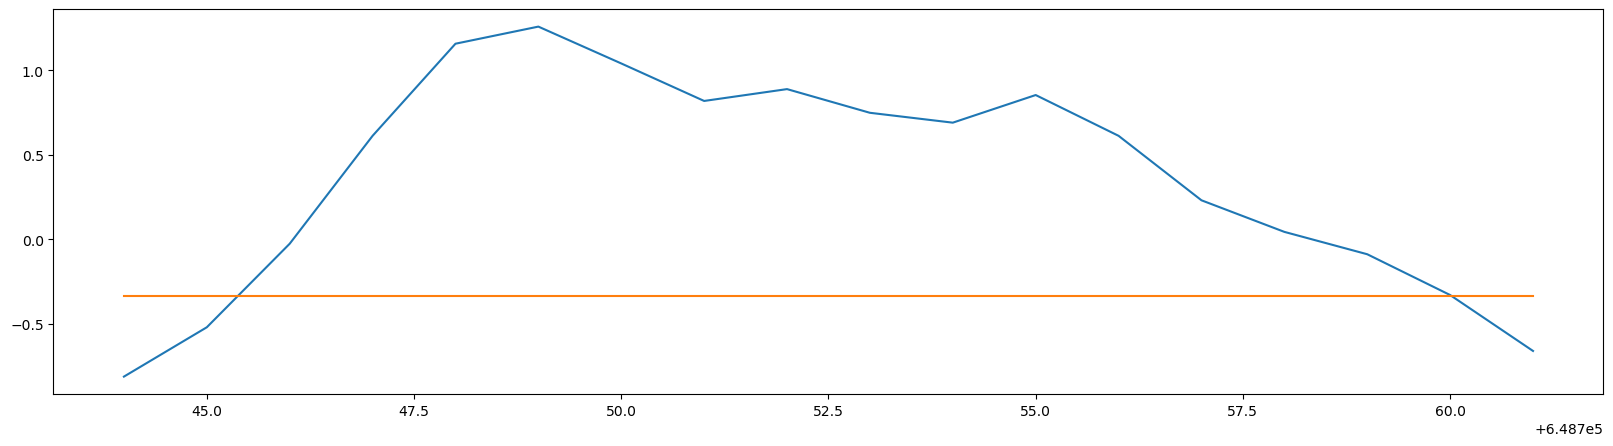

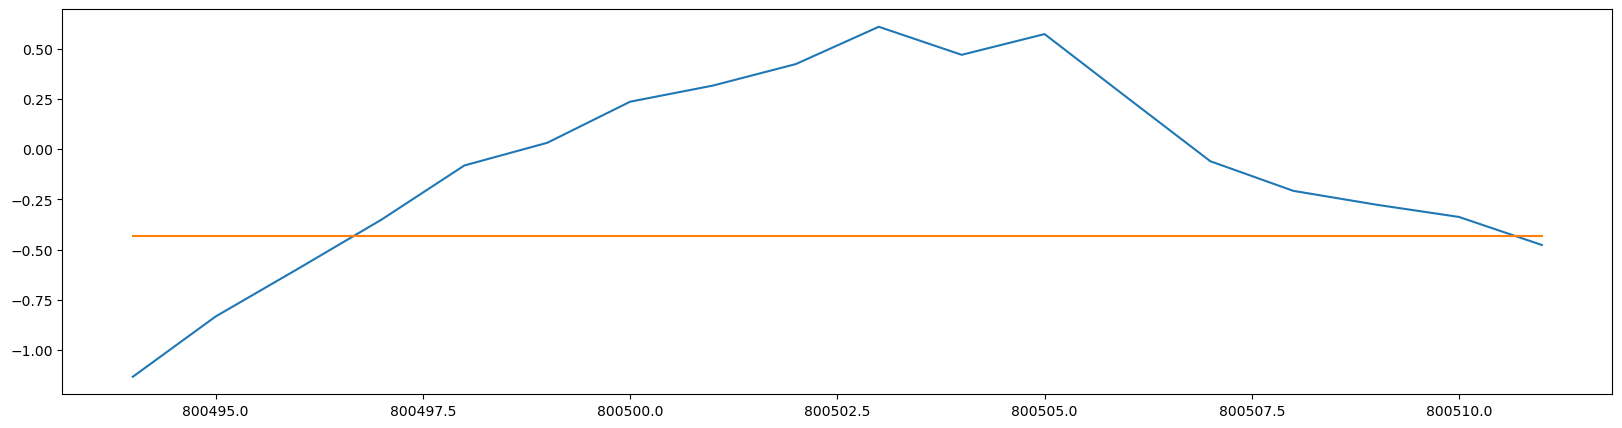

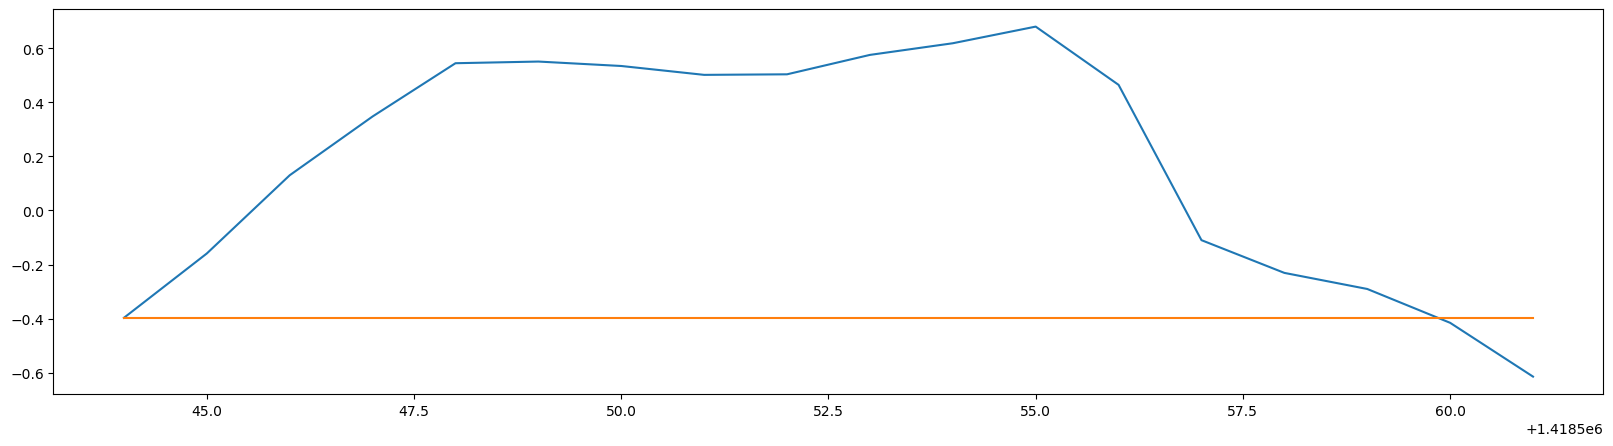

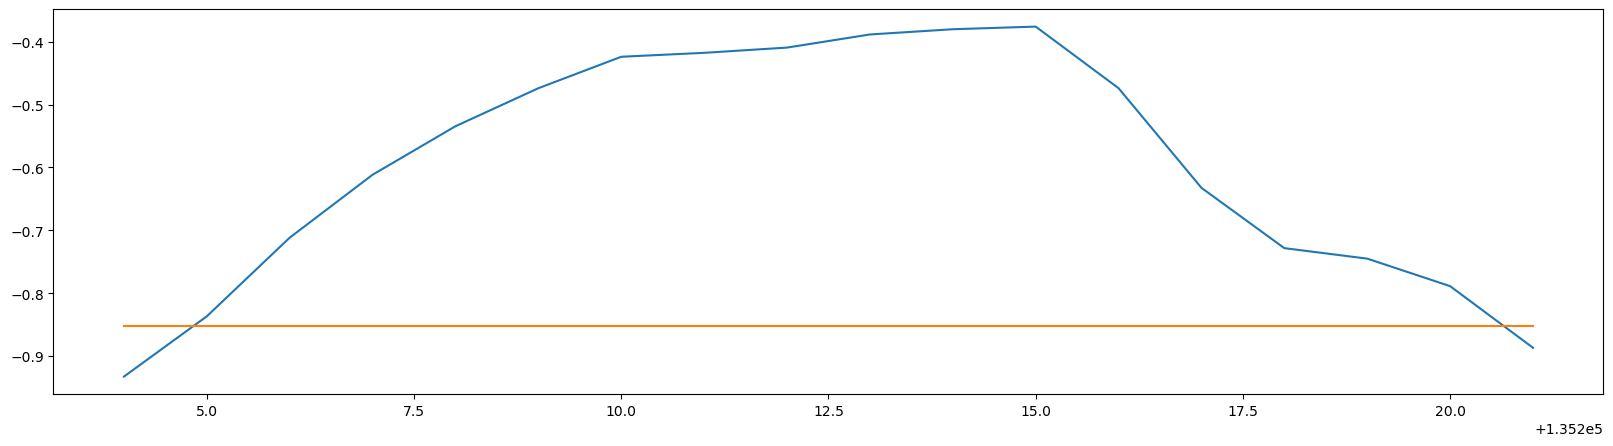

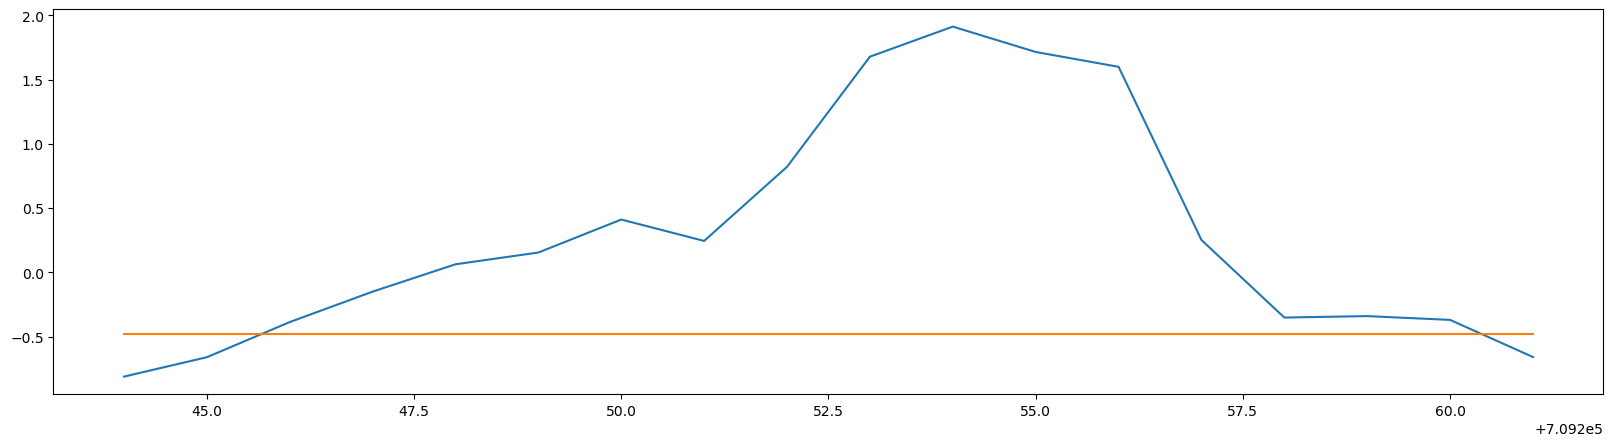

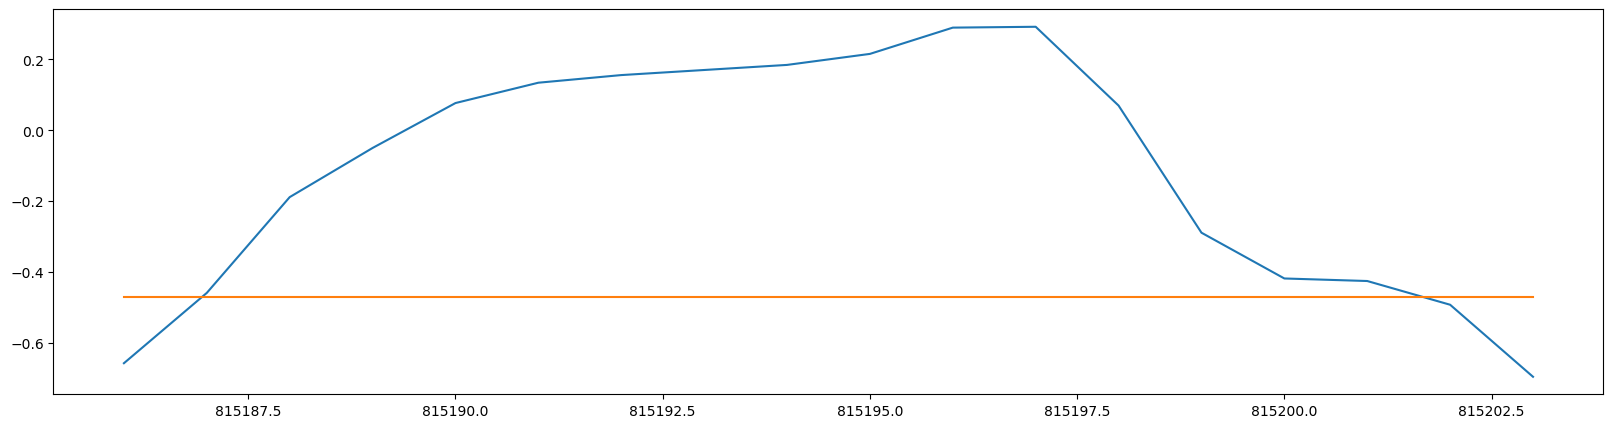

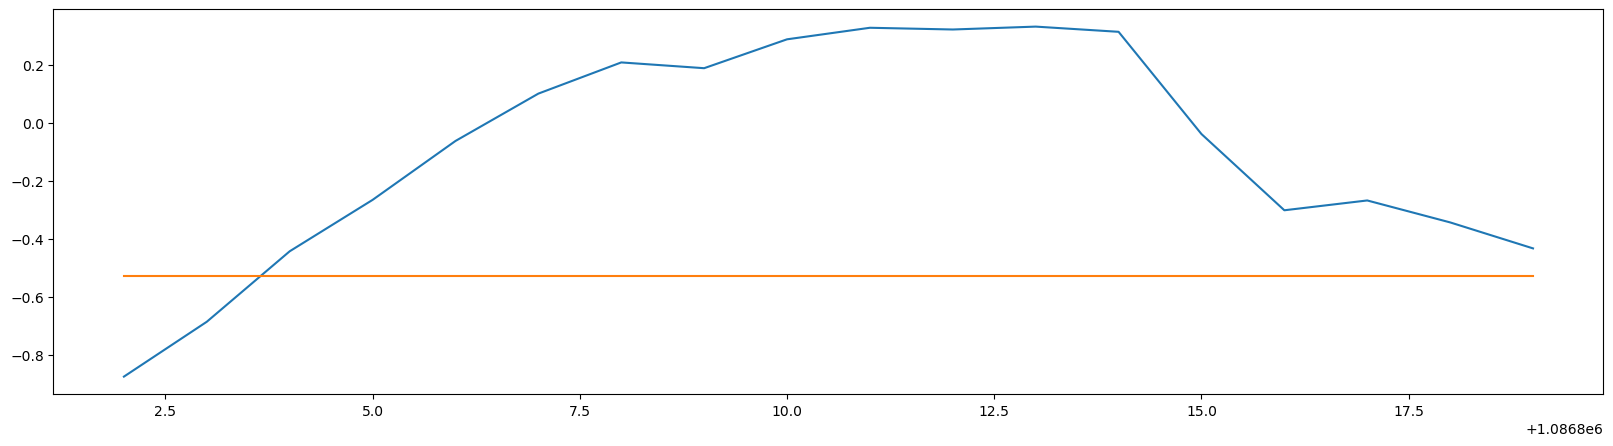

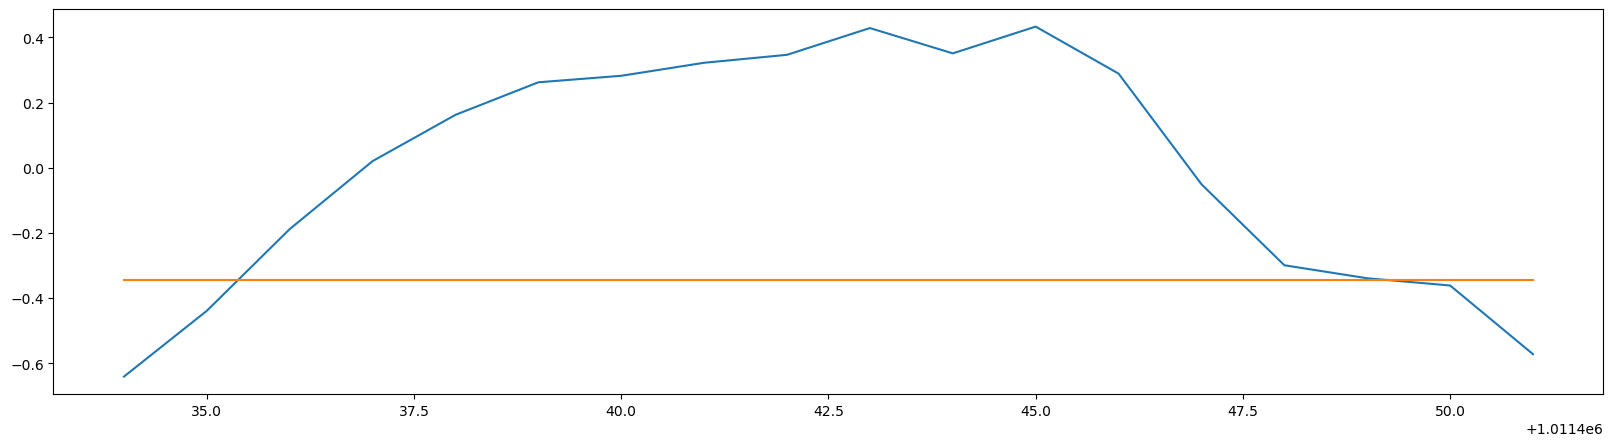

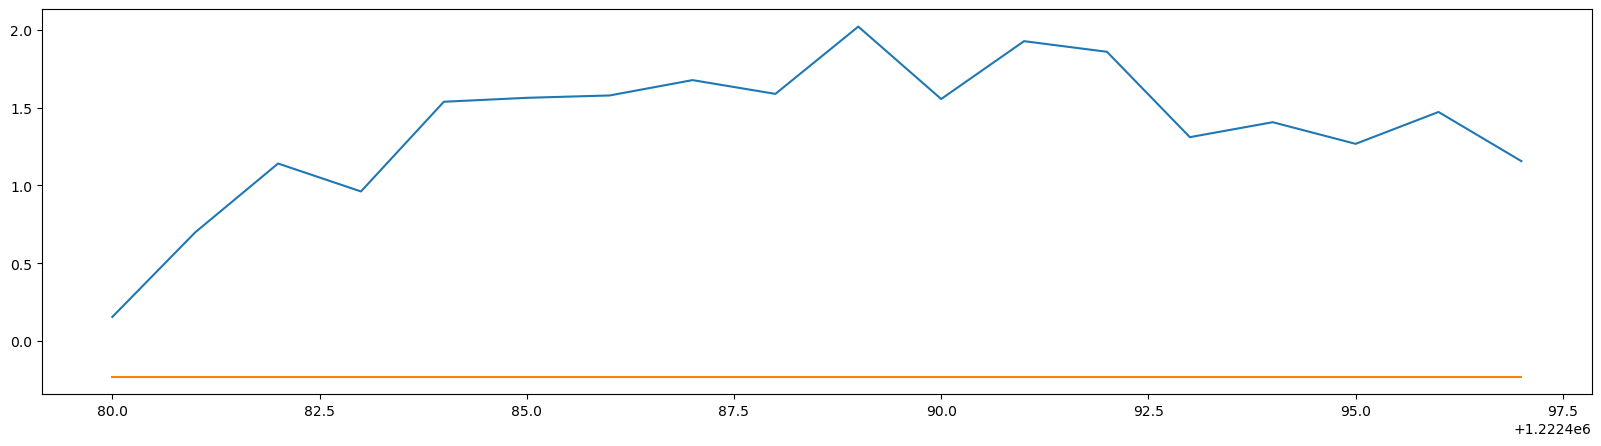

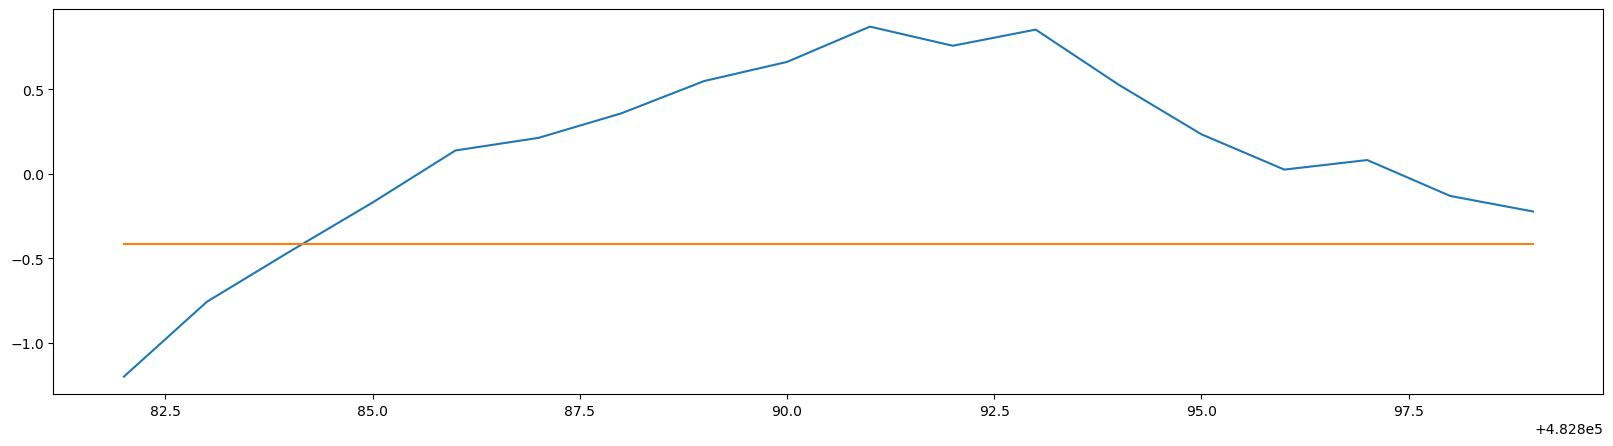

In [4]:
for i in range(10):
    unique_id = results_df['unique_id'].unique()[np.random.randint(100)]
    plot_df = results_df.query('unique_id == @unique_id')
    unique_id

    plt.figure(figsize=(20, 5))
    plt.plot(plot_df['y'], label='y')
    plt.plot(plot_df[model_name], label='y_hat')
    plt.show()

In [ ]:
import pandas as pd
import numpy as npx

from datasetsforecast.m4 import M4
from datasetsforecast.m3 import M3
from datasetsforecast.long_horizon import LongHorizon
from datasetsforecast.losses import mae
from statsforecast.utils import AirPassengersDF

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, AutoETS, Naive

In [ ]:
target_dataset = 'TrafficL'
horizon = 18

In [ ]:
if (target_dataset == 'AirPassengers'):
    Y_df_target = AirPassengersDF.copy()
    Y_df_target['ds'] = pd.to_datetime(Y_df_target['ds'])
    test_size = horizon
    frequency = 'M'
elif (target_dataset == 'M3'):
    Y_df_target, *_ = M3.load(directory='./', group='Monthly')
    Y_df_target['ds'] = pd.to_datetime(Y_df_target['ds'])
    frequency = 'M'
    test_size = horizon
elif (target_dataset == 'M4'):
    Y_df_target, *_ = M4.load(directory='./', group='Monthly', cache=True)
    Y_df_target['ds'] = pd.to_datetime(Y_df_target['ds'])
    frequency = 'M'
    test_size = horizon
elif (target_dataset == 'ILI'):
    Y_df_target, _, _ = LongHorizon.load(directory='./', group='ILI')
    Y_df_target['ds'] = np.repeat(np.array(range(len(Y_df_target)//7)), 7)
    test_size = horizon
    frequency = 'W'
elif (target_dataset == 'TrafficL'):
    Y_df_target, _, _ = LongHorizon.load(directory='./', group='TrafficL')
    Y_df_target['ds'] = np.repeat(np.array(range(len(Y_df_target)//862)), 862)
    test_size = horizon

In [ ]:
unique_ids = Y_df_target['unique_id'].unique()
unique_ids = np.random.choice(unique_ids,size=20)
Y_df_target = Y_df_target[Y_df_target['unique_id'].isin(unique_ids)].reset_index(drop=True)
Y_df_target = Y_df_target.groupby('unique_id').tail(200).reset_index(drop=True)

In [ ]:
Y_df_target

In [ ]:
season_length = 12 # Monthly data 
#season_length = 24 # Monthly data 

# Include the models you imported
models = [
    AutoARIMA(season_length=season_length),
    #AutoETS(season_length=season_length),
    Naive()
]

# Instansiate the StatsForecast class as sf
sf = StatsForecast(
    df=Y_df_target,
    models=models,
    freq='M', 
    n_jobs=-1
)

crossvalidation_df = sf.cross_validation(
    df = Y_df_target,
    h = horizon,
    step_size = 1,
    n_windows = 1
  )

In [ ]:
crossvalidation_df = crossvalidation_df.reset_index(drop=True)
crossvalidation_df

In [ ]:
for model_name in ['AutoARIMA', 'Naive']:
    print('Model:', model_name)
    mae_loss = mae(crossvalidation_df['y'], crossvalidation_df[model_name])
    print('mae:', mae_loss)